## TIỀN XỬ LÝ XỬ LIỆU

### 1. THƯ VIỆN

### - Import các thư viện cần thiết

In [20]:
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### - Đọc tập dữ liệu bằng thư viện Pandas

In [21]:
rain_df = pd.read_csv("E:/DA/DO_AN_CUOI_KY/DATASET/weatherAUS.csv")
rain_df.head(5)
#rain_df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 2. Tiền xử lý

In [22]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

- DataFrame này chứa dữ liệu về thời tiết, bao gồm các thông tin như trên.
- DataFrame có kích thước khá lớn, với 145460 dòng và 23 cột.

In [23]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


- Ý nghĩa:
    + count : Số lượng các giá trị không bị thiếu (không phải là null) trong mỗi cột. Nói cách khác, đây là số lượng các quan sát có dữ liệu đầy đủ cho từng biến.
    + mean : Giá trị trung bình của mỗi cột. Đây là một chỉ số đo lường xu hướng trung tâm của dữ liệu.
    + std : Độ lệch chuẩn. Đây là một chỉ số đo lường mức độ phân tán của dữ liệu so với giá trị trung bình. Độ lệch chuẩn càng cao, dữ liệu càng phân tán.
    + min : Giá trị nhỏ nhất của mỗi cột.
    + 25% : Giá trị phần tư thứ nhất (Q1). 25% số liệu có giá trị nhỏ hơn hoặc bằng Q1.
    + 50% : Giá trị trung vị (Q2). 50% số liệu có giá trị nhỏ hơn hoặc bằng Q2.
    + 75% : Giá trị phần tư thứ ba (Q3). 75% số liệu có giá trị nhỏ hơn hoặc bằng Q3.
    + max : Giá trị lớn nhất của mỗi cột.

- Ví dụ:
    + Cột Rainfall : Giá trị trung bình (mean) của lượng mưa là 2.32194. Điều này cho thấy trung bình mỗi lần đo, lượng mưa là khoảng 2.32 mm. Giá trị min là 0, cho thấy có những lần không có mưa. Giá trị max khá cao, cho thấy có những lần mưa rất lớn.

#### Kiểm tra số lượng giá trị duy nhất, số lượng giá trị null của từng thuộc tính

In [24]:
rain_df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

-> Giá trị duy nhất của mỗi thuộc tính

In [25]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

-> Số lượng giá trị null của từng thuộc tính.

In [26]:

# Kiểm tra và đếm số lượng giá trị null trong mỗi dòng
rain_df_isnull = rain_df.isnull()
rain_df_null_count = rain_df_isnull.sum(axis=1)

# Lọc và giữ lại các dòng có nhiều hơn 1 giá trị null hoặc không có giá trị null nào
rain_df_cleaned = rain_df[rain_df_null_count != 1]

rain_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134551 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           134551 non-null  object 
 1   Location       134551 non-null  object 
 2   MinTemp        133084 non-null  float64
 3   MaxTemp        133293 non-null  float64
 4   Rainfall       131290 non-null  float64
 5   Evaporation    73619 non-null   float64
 6   Sunshine       70277 non-null   float64
 7   WindGustDir    124234 non-null  object 
 8   WindGustSpeed  124288 non-null  float64
 9   WindDir9am     125467 non-null  object 
 10  WindDir3pm     130479 non-null  object 
 11  WindSpeed9am   132784 non-null  float64
 12  WindSpeed3pm   131489 non-null  float64
 13  Humidity9am    131921 non-null  float64
 14  Humidity3pm    130070 non-null  float64
 15  Pressure9am    119518 non-null  float64
 16  Pressure3pm    119540 non-null  float64
 17  Cloud9am       78856 non-null   fl

- Kết quả: Sau khi xóa đi các dòng chỉ có 1 giá trị null, tập dữ liệu còn 134551 dòng

### LÀM SẠCH DỮ LIỆU

In [27]:
rain_df_cleaned = rain_df_cleaned.drop(['Evaporation', 'WindGustDir', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm'], axis=1)

- Xóa đi các cột không cần thiết cho việc phân tích dữ liệu.

###  Xử lý dữ liệu thời gian

In [28]:
# Chuyển đổi cột 'Date' thành kiểu datetime
rain_df_cleaned['Date'] = pd.to_datetime(rain_df_cleaned['Date'], format='%Y-%m-%d')

# Tạo cột 'Month' và 'Year' từ cột 'Date'
rain_df_cleaned['Month'] = rain_df_cleaned['Date'].dt.month
rain_df_cleaned['Year'] = rain_df_cleaned['Date'].dt.year



- Chuyển cột Date về kiểu dữ liệu datetime.
- Thêm cột Month, Year.

### Tạo thêm cột Region

In [29]:
# tạo cột "State/Territory" (Tiểu bang/ Lãnh thổ) dựa trên "Location"
rain_df_cleaned['State/Territory'] = np.nan

location_to_state = {
    'New South Wales': ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
                        'Newcastle', 'NorahHead', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                        'WaggaWagga', 'Williamtown', 'Wollongong'],
    'Norfolk Island': ['NorfolkIsland'],
    'Australian Capital Territory': ['Canberra', 'Tuggeranong', 'MountGinini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'Melbourne', 'Mildura', 'Nhil',
                 'Portland', 'Dartmoor', 'MelbourneAirport', 'Watsonia'],
    'Queensland': ['Cairns', 'GoldCoast', 'Townsville', 'Brisbane'],
    'South Australia': ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'],
    'Western Australia': ['Albany', 'Witchcliffe', 'PearceRAAF', 'SalmonGums', 'Walpole', 'Perth', 'PerthAirport'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Northern Territory': ['AliceSprings', 'Katherine', 'Uluru', 'Darwin'],
}

for state, locations in location_to_state.items():
    rain_df_cleaned.loc[rain_df_cleaned['Location'].isin(locations), 'State/Territory'] = state


C:\Users\panh2\AppData\Local\Temp\ipykernel_11824\576308527.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'New South Wales' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rain_df_cleaned.loc[rain_df_cleaned['Location'].isin(locations), 'State/Territory'] = state


In [30]:
# tạo cột "Region" (Khu vực) dựa trên cột "State/Territory"
rain_df_cleaned['Region'] = np.nan
region_mapping = {
    'Northern Territory': 'North',
    'Western Australia': 'West',
    'South Australia': 'South',
    'New South Wales': 'Southeast',
    'Victoria': 'Southeast',
    'Tasmania': 'Southeast',
    'Australian Capital Territory': 'Southeast',
    'Norfolk Island': 'East',
    'Queensland': 'East'
}

for state, region in region_mapping.items():
    rain_df_cleaned.loc[rain_df_cleaned['State/Territory'] == state, 'Region'] = region




C:\Users\panh2\AppData\Local\Temp\ipykernel_11824\2319919442.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'North' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rain_df_cleaned.loc[rain_df_cleaned['State/Territory'] == state, 'Region'] = region


In [31]:
# Tạo cột "Season" (Mùa) dựa trên cột "Region" và "Month"
rain_df_cleaned['Season'] = np.nan

for index, row in rain_df_cleaned.iterrows():
    if (row['Region'] in ['North', 'Northeast']):
        if (5 <= row['Month'] <= 10):
            rain_df_cleaned.at[index, 'Season'] = 'Dry'
        else:
            rain_df_cleaned.at[index, 'Season'] = 'Wet'
    elif (row['Region'] in ['East', 'South', 'Southeast', 'West']):
        if (3 <= row['Month'] <= 5):
            rain_df_cleaned.at[index, 'Season'] = 'Autumn'
        elif (6 <= row['Month'] <= 8):
            rain_df_cleaned.at[index, 'Season'] = 'Winter'
        elif (9 <= row['Month'] <= 11):
            rain_df_cleaned.at[index, 'Season'] = 'Spring'
        else:
            rain_df_cleaned.at[index, 'Season'] = 'Summer'

# Sắp xếp lại các cột (nếu muốn)
rain_df_cleaned = rain_df_cleaned[['Date', 'Month', 'Year', 'Location', 'Region', 'Season', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
                                   'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]

rain_df_cleaned.head(3)

C:\Users\panh2\AppData\Local\Temp\ipykernel_11824\4113604409.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Summer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  rain_df_cleaned.at[index, 'Season'] = 'Summer'


,Date,Month,Year,Location,Region,Season,MinTemp,MaxTemp,Rainfall,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,12,2008,Albury,Southeast,Summer,13.4,22.9,0.6,NaN,...,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,12,2008,Albury,Southeast,Summer,7.4,25.1,0.0,NaN,...,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,12,2008,Albury,Southeast,Summer,12.9,25.7,0.0,NaN,...,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No


### XỬ LÝ DỮ LIỆU BỊ THIẾU

- Xác định những dữ liệu có nhiều hơn 30% dữ liệu bị thiếu.

In [32]:
# Hàm kiểm tra tỷ lệ giá trị thiếu
def has_missing_data(col):
    return col.isnull().mean() > 0.3

# Áp dụng hàm lên từng cột và lấy ra các cột thỏa mãn điều kiện
missing_cols = rain_df_cleaned.columns[rain_df_cleaned.apply(has_missing_data)]

# In kết quả
print(f"Số lượng cột thuộc tính có hơn 30% dữ liệu bị thiếu: {len(missing_cols)}")
print("Các cột thuộc tính có hơn 30% dữ liệu bị thiếu:")
print(missing_cols.tolist())

Số lượng cột thuộc tính có hơn 30% dữ liệu bị thiếu: 1
Các cột thuộc tính có hơn 30% dữ liệu bị thiếu:
['Sunshine']


- Xử lý dữ liệu thiếu với biến mục tiêu.

In [33]:
# Tách các hàng có giá trị null ở cột "RainTomorrow" ra null_df
null_df = rain_df_cleaned.query('RainTomorrow.isnull()').copy()

# Xóa các hàng có giá trị null ở cột "RainTomorrow" khỏi df
rain_df_cleaned.drop(rain_df_cleaned[rain_df_cleaned['RainTomorrow'].isnull()].index, inplace=True)

- Đối với biến số, điền giá trị trung bình cho các điểm dữ liệu bị trống.

In [34]:
num_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindSpeed9am',
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
            'Temp9am', 'Temp3pm']

In [35]:
for col in num_col:
    rain_df_cleaned[col] = rain_df_cleaned[col].fillna(rain_df_cleaned[col].mean())

- Đối với biến định lượng, sử dụng yếu vị để điền vào dữ liệu bị trống cho các cột.

In [36]:
rain_df_cleaned['RainToday'] = rain_df_cleaned['RainToday'].astype('object')
cate_col = rain_df_cleaned.select_dtypes(include=['object'])
for col in cate_col:
    rain_df_cleaned[col] = rain_df_cleaned[col].fillna(rain_df_cleaned[col].mode()[0])

### XỬ LÝ GIÁ TRỊ NGOẠI LAI

In [37]:
print(f'{len(num_col)} biến: {num_col}')

12 biến: ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


- Loại bỏ các giá trị ngoại lai.

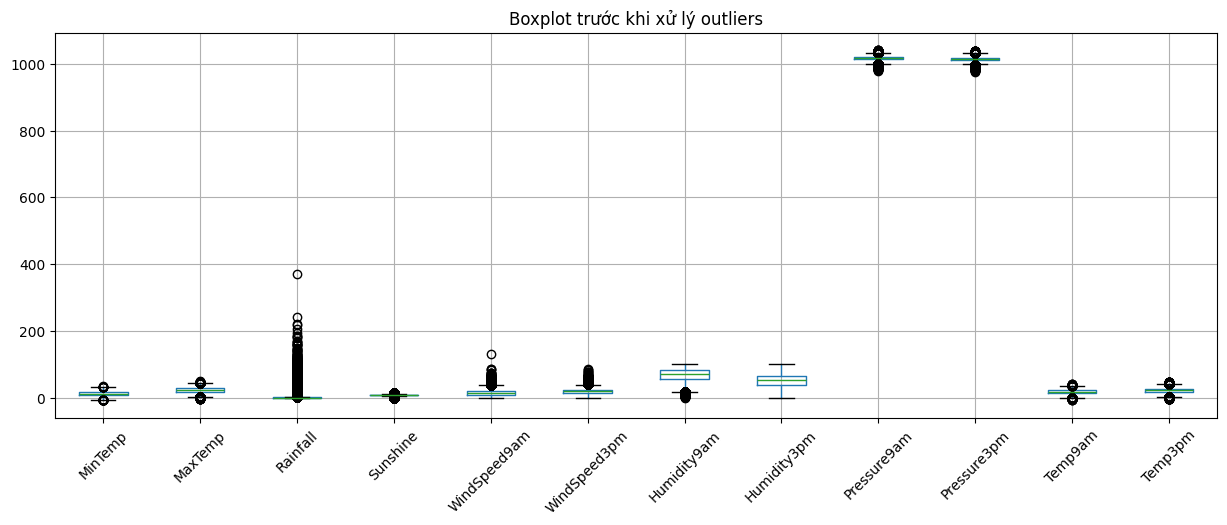

Cột MinTemp: đã loại bỏ 24 outliers
Cột MaxTemp: đã loại bỏ 313 outliers
Cột Rainfall: đã loại bỏ 2467 outliers
Cột Sunshine: đã loại bỏ 0 outliers
Cột WindSpeed9am: đã loại bỏ 1152 outliers
Cột WindSpeed3pm: đã loại bỏ 620 outliers
Cột Humidity9am: đã loại bỏ 505 outliers
Cột Humidity3pm: đã loại bỏ 0 outliers
Cột Pressure9am: đã loại bỏ 662 outliers
Cột Pressure3pm: đã loại bỏ 297 outliers
Cột Temp9am: đã loại bỏ 49 outliers
Cột Temp3pm: đã loại bỏ 203 outliers

Tổng số outliers đã loại bỏ: 6292
Tỷ lệ dữ liệu giữ lại: 95.21%


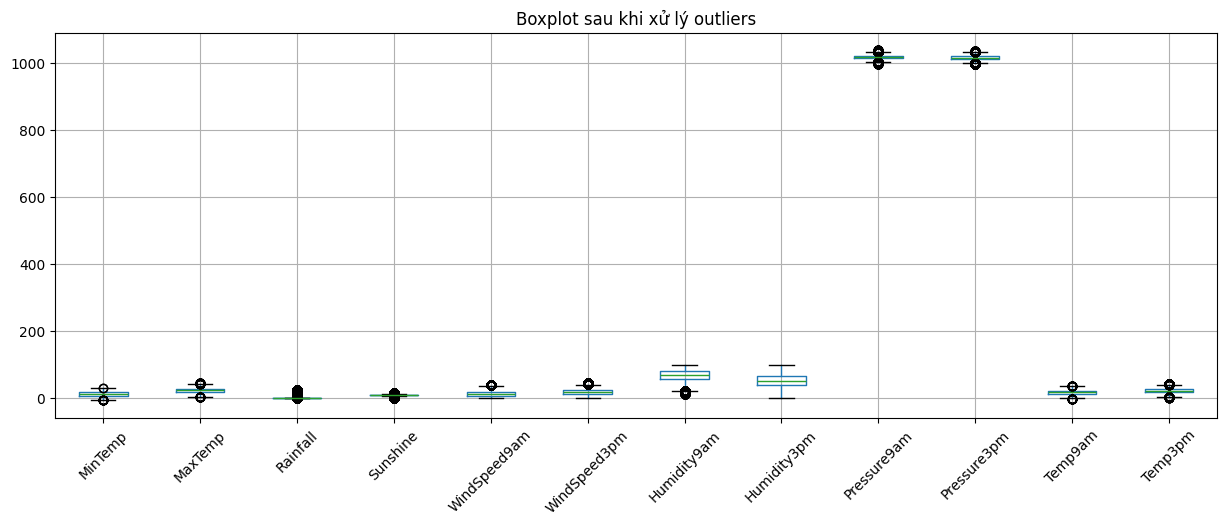

In [39]:
# Gán rain_df_cleaned cho df
df = rain_df_cleaned.copy()

# Import thư viện cần thiết
from scipy import stats
import numpy as np

def remove_outliers_zscore(df, columns, threshold=3):
    """
    Loại bỏ outliers sử dụng phương pháp zscore
    df: DataFrame
    threshold: ngưỡng Z-score (mặc định là 3)
    """
    df_clean = df.copy()
    outliers_removed = 0

    for column in columns:
        # Tính Z-score
        z_scores = np.abs(stats.zscore(df_clean[column]))

        # Đếm số outliers
        outliers = df_clean[z_scores > threshold].shape[0]
        outliers_removed += outliers

        # Lọc dữ liệu
        df_clean = df_clean[z_scores <= threshold]

        print(f'Cột {column}: đã loại bỏ {outliers} outliers')
    
    print(f'\nTổng số outliers đã loại bỏ: {outliers_removed}')
    print(f'Tỷ lệ dữ liệu giữ lại: {(len(df_clean)/len(df)*100):.2f}%')

    return df_clean

# Vẽ boxplot trước khi xử lý
plt.figure(figsize=(15, 5))
df[num_col].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot trước khi xử lý outliers')
plt.show()

# Áp dụng phương pháp Z-score
df_no_outliers = remove_outliers_zscore(df, num_col)

# Vẽ boxplot sau khi xử lý
plt.figure(figsize=(15, 5))
df_no_outliers[num_col].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot sau khi xử lý outliers')
plt.show()

### XÓA CÁC DÒNG SAI RÀNG BUỘC

In [ ]:
# lọc dòng có giá trị vượt ngưỡng ràng buộc
temp9am = rain_df_cleaned[(rain_df_cleaned['Temp9am'] < rain_df_cleaned['MinTemp']) | (rain_df_cleaned['Temp9am'] > rain_df_cleaned['MaxTemp'])]
temp3pm = rain_df_cleaned[(rain_df_cleaned['Temp3pm'] < rain_df_cleaned['MinTemp']) | (rain_df_cleaned['Temp3pm'] > rain_df_cleaned['MaxTemp'])]
incorrect_values = pd.concat([temp9am, temp3pm]).drop_duplicates()
col = ['Location', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'RainToday']
incorrect_values[col]

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm,RainToday
284,Albury,12.178141,18.8,8.700000,18.100000,No
612,Albury,12.178141,11.8,6.700000,11.300000,No
1566,Albury,10.000000,13.4,16.952767,12.300000,Yes
1686,Albury,12.178141,18.5,11.400000,17.800000,No
1932,Albury,8.200000,15.2,16.952767,14.800000,Yes
...,...,...,...,...,...,...
143847,Katherine,21.800000,34.6,28.200000,21.587538,No
144178,Uluru,21.400000,24.8,23.800000,17.700000,No
144203,Uluru,24.000000,30.4,25.400000,21.587538,No
145159,Uluru,14.200000,14.4,14.200000,14.000000,Yes


In [ ]:
# xóa các dòng lọc khỏi df
df = rain_df_cleaned.drop(incorrect_values.index)
print(f'Phần trăm số dòng đã xóa: {((incorrect_values.shape[0]) * 100 / df.shape[0]):.2f}%')

Phần trăm số dòng đã xóa: 2.33%


In [ ]:
df.to_csv("E:/DA/DO_AN_CUOI_KY/DATASET"+'/weatherUS_final.csv', index=False)